This notebook analyses the MISO load zone LMP data for 2021 to identify how often the LMP is negative, which is an indicator of a condition where demand response is potentially beneficial.

In [1]:
import os, sys
sys.path.append(os.getcwd().replace("/docs","/source"))
import miso

Load the LMP data.

In [2]:
lmp = miso.LMP("2021-01-01","2021-12-31","rt_lmp_final",values="LMP",types="Loadzone")
data = lmp.dataframe()

Group by the data by day and hour and plot the maximum, median, and minimum.

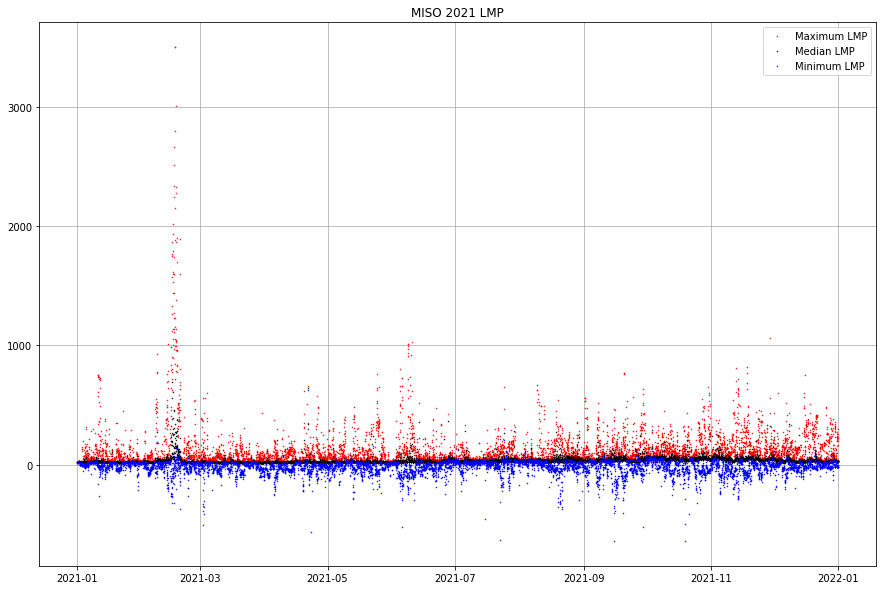

In [3]:
dt = data.groupby("Datetime")
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(dt.max(),".r",label="Maximum LMP",markersize=1)
plt.plot(dt.median(),".k",label="Median LMP",markersize=1)
plt.plot(dt.min(),".b",label="Minimum LMP",markersize=1)
plt.grid()
plt.legend()
plt.title("MISO 2021 LMP");

Count how the fraction of LMPs that are negative in each load zone.

In [4]:
neg = (data[data.Value<0].groupby("Node").count() / data.groupby("Node").count()).dropna().sort_values("Value",ascending=False)
neg

,Value
Node,
OTP.MDU,0.310388
OTP.NWPS,0.310388
ALTW.CMMPA.WIN,0.248973
ALTW.MRES,0.243265
ALTW.WRTHNGT,0.238470
...,...
AMIL.PALMCOIL,0.000114
IPL.HE,0.000114
IPL.IPL,0.000114


Plot the fraction of negative LMPs by load zone.

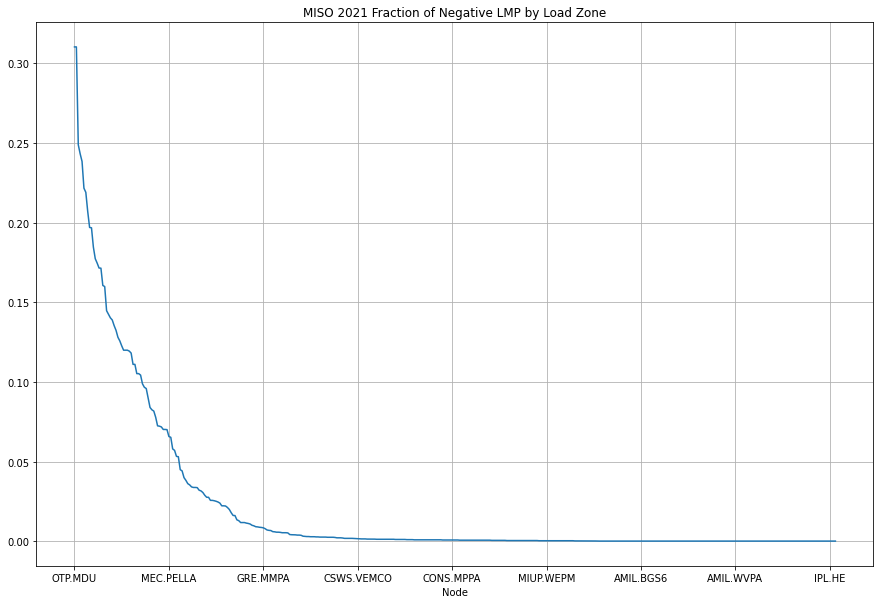

In [5]:
neg.plot(figsize=(15,10),grid=True,legend=False,title="MISO 2021 Fraction of Negative LMP by Load Zone");

Plot the load zone LMPs as price duration curves.

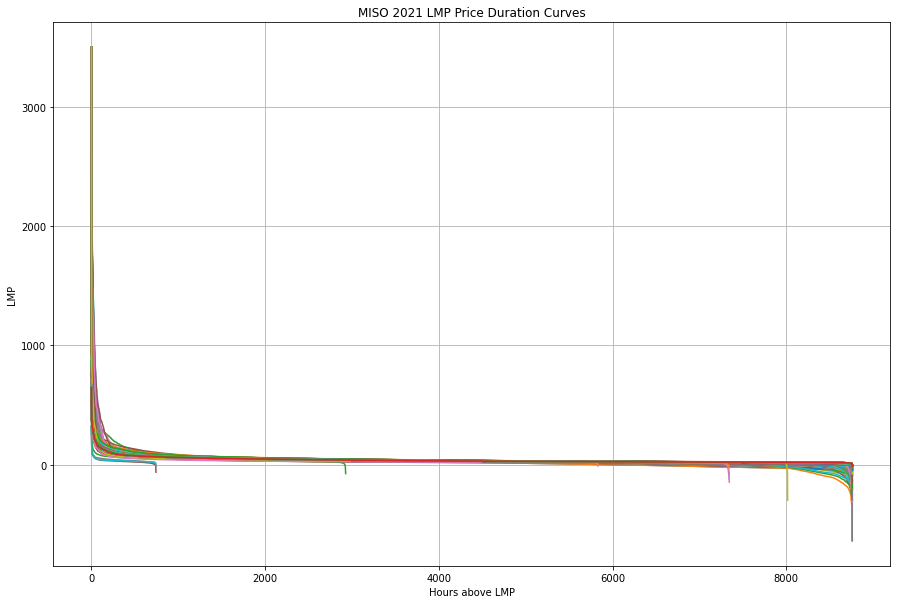

In [6]:
data = data.reset_index().set_index(["Node","Datetime"])
plt.figure(figsize=(15,10))
for zone in list(neg.index.get_level_values(0).unique()):
    plt.plot(data.loc[zone,:].sort_values("Value",ascending=False).values)
plt.title("MISO 2021 LMP Price Duration Curves")
plt.xlabel("Hours above LMP")
plt.ylabel("LMP")
plt.grid()